In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import unique
from numpy import argmax
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# load dataset

dataframe = pd.read_csv("ParisHousingClass.csv")
print('Shape before deleting duplicate values:', dataframe.shape)

dataframe=dataframe.drop_duplicates()

dataframe.head()
dataset = dataframe.values
print('Shape After deleting duplicate values:', dataframe.shape)


Shape before deleting duplicate values: (10000, 11)
Shape After deleting duplicate values: (10000, 11)


In [4]:
#Checking missing data
dataframe.isnull().sum().sort_values(ascending=False)

squareMeters     0
numberOfRooms    0
hasYard          0
hasPool          0
floors           0
cityCode         0
cityPartRange    0
numPrevOwners    0
hasGuestRoom     0
price            0
category         0
dtype: int64

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   squareMeters   10000 non-null  int64  
 1   numberOfRooms  10000 non-null  int64  
 2   hasYard        10000 non-null  int64  
 3   hasPool        10000 non-null  int64  
 4   floors         10000 non-null  int64  
 5   cityCode       10000 non-null  int64  
 6   cityPartRange  10000 non-null  int64  
 7   numPrevOwners  10000 non-null  int64  
 8   hasGuestRoom   10000 non-null  int64  
 9   price          10000 non-null  float64
 10  category       10000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 937.5 KB


In [6]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
hasGuestRoom,10000.0,4.994600e+00,3.176410e+00,0.0,2.00,5.0,8.00,10.0
price,10000.0,4.993448e+06,2.877424e+06,10313.5,2516401.95,5016180.3,7469092.45,10006771.2


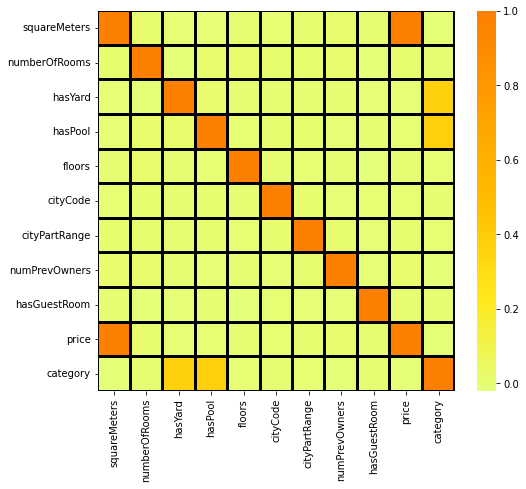

In [7]:
fig = plt.figure(figsize = (8,7))
data_ploting = dataframe.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Wistia', linecolor='black', linewidths= 2 )
plt.show()

In [8]:

# split into input (X) and output (y) variables
X, y = dataset[:, 1:-1], dataset[:, -1]
X, y = X.astype('float'), y.astype('float')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Sandardization of data 
PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

n_features = X.shape[1]

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [10]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6700, 9)
(6700,)
(3300, 9)
(3300,)


In [11]:
#Using the random forest classifier for the prediction
classifier=RandomForestClassifier()
classifier=classifier.fit(X_train,y_train)
predicted=classifier.predict(X_test)
print("---------Random Forest Classifier Results ----------")
print ('Accuracy      : ',accuracy_score(y_test, predicted))
print ('Recall        : ', recall_score(y_test, predicted, average="weighted"))
print ('Precision     : ', precision_score(y_test, predicted, average="weighted"))
print ('F1 Score      : ',f1_score(y_test, predicted, average="micro"))

---------Random Forest Classifier Results ----------
Accuracy      :  0.8663636363636363
Recall        :  0.8663636363636363
Precision     :  0.8667773741653357
F1 Score      :  0.8663636363636363


In [12]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)
n_class = len(unique(y))

In [13]:
# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))

In [14]:
from matplotlib import pyplot as plt
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy' ])
# fit the keras model on the dataset
history =model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)



Epoch 1/150
210/210 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.8630 - sparse_categorical_crossentropy: 0.3548
Epoch 2/150
210/210 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.8730 - sparse_categorical_crossentropy: 0.2117
Epoch 3/150
210/210 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.8776 - sparse_categorical_crossentropy: 0.1829
Epoch 4/150
210/210 [==============================] - 0s 2ms/step - loss: 0.1778 - accuracy: 0.8797 - sparse_categorical_crossentropy: 0.1778
Epoch 5/150
210/210 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.8822 - sparse_categorical_crossentropy: 0.1762
Epoch 6/150
210/210 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.8849 - sparse_categorical_crossentropy: 0.1749
Epoch 7/150
210/210 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.8836 - sparse_categorical_crossentropy: 0.1746

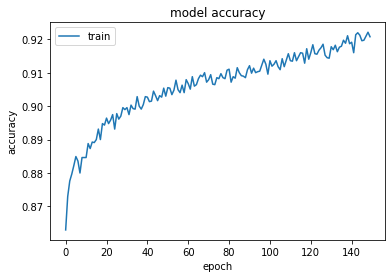

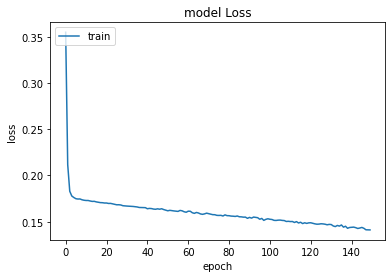

In [23]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:

# evaluate on test set
yhat = model.predict(X_test)
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

104/104 [==============================] - 0s 1ms/step
Accuracy: 0.868


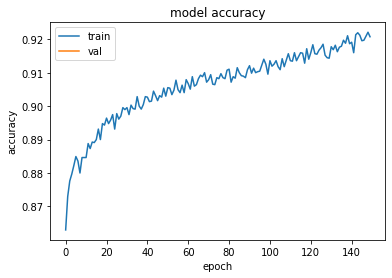

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
TrialNumber=0
batch_size_list=[5, 10, 15, 20]
epoch_list=[5, 10, 50 ,100]
unitnums=[ 3, 5, 10, 15, 20]
import pandas as pd
SearchResultsTrainData=pd.DataFrame(columns=['TrialNumber', 'epoch','Parameters', 'Accuracy'])
SearchResultsTestData=pd.DataFrame(columns=['TrialNumber', 'epoch','Parameters', 'Accuracy'])

for batch_size_trial in batch_size_list:
    for epochs_trial in epoch_list:
        for unit in unitnums:
            TrialNumber+=1
            # define the keras model
            model = Sequential()
            model.add(Dense(unit, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
            model.add(Dense(unit+5, activation='relu', kernel_initializer='he_normal'))
            model.add(Dense(unit+10, activation='relu', kernel_initializer='he_normal'))
            model.add(Dense(unit+5, activation='relu', kernel_initializer='he_normal'))
            model.add(Dense(unit, activation='relu', kernel_initializer='he_normal'))
            model.add(Dense(n_class, activation='softmax'))

            # compile the keras model
            model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])
            #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            # fit the keras model on the dataset
            ANN_Model=model.fit(X_train, y_train, epochs=epochs_trial, batch_size=batch_size_trial, verbose=0)
            Accuracy = ANN_Model.history['accuracy'][-1]
            SearchResultsTrainData=SearchResultsTrainData.append(pd.DataFrame(data=[[TrialNumber,epochs_trial,"Input neurons"+str(unit) +'-'+
                                'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                        columns=['TrialNumber','epoch', 'Parameters', 'Accuracy'] ))

            # evaluate on test set
            yhat = model.predict(X_test)
            yhat = argmax(yhat, axis=-1).astype('int')
            acc = accuracy_score(y_test, yhat)
            # printing the results of the current iteration
            print(TrialNumber, 'unitNum:',unit, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', acc)
            SearchResultsTestData=SearchResultsTestData.append(pd.DataFrame(data=[[TrialNumber,epochs_trial,"Input neurons"+str(unit) +'-'+
                                'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), acc]],
                                                                        columns=['TrialNumber','epoch', 'Parameters', 'Accuracy'] ))


104/104 [==============================] - 0s 1ms/step
1 unitNum: 3 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8742424242424243
104/104 [==============================] - 0s 1ms/step
2 unitNum: 5 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8766666666666667
104/104 [==============================] - 0s 2ms/step
3 unitNum: 10 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8660606060606061
104/104 [==============================] - 0s 2ms/step
4 unitNum: 15 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8703030303030304
104/104 [==============================] - 0s 2ms/step
5 unitNum: 20 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8648484848484849
104/104 [==============================] - 0s 2ms/step
6 unitNum: 3 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.8690909090909091
104/104 [==============================] - 0s 2ms/step
7 unitNum: 5 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.866969696969697
104/104 [==============================] - 0s 1ms/s

  TrialNumber epoch                             Parameters  Accuracy
0          40   100  Input neurons20-batch_size10-epoch100  0.975672
  TrialNumber epoch                         Parameters  Accuracy
0           2     5  Input neurons5-batch_size5-epoch5  0.876667


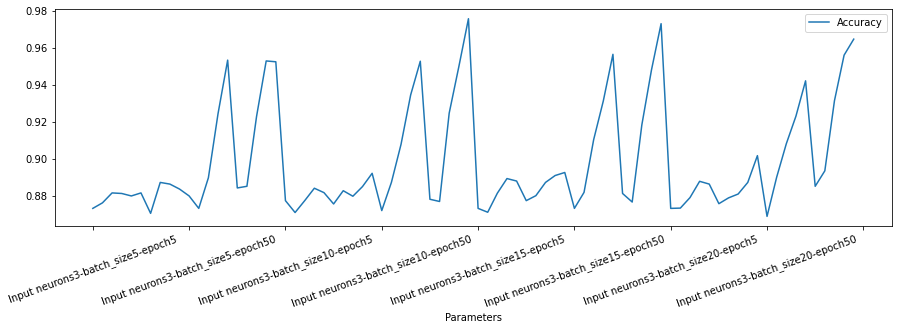

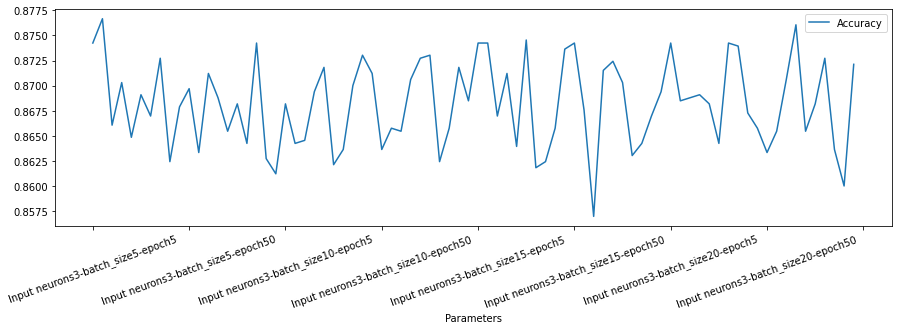

In [22]:
print(SearchResultsTrainData.sort_values(by='Accuracy', ascending=False).head(1))
print(SearchResultsTestData.sort_values(by='Accuracy', ascending=False).head(1))
 
# Visualizing the results
%matplotlib inline
SearchResultsTrainData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)
SearchResultsTestData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)